# ⚡ Apresentação

**Curso :** Inteligência Artificial


**Alunos:** Camila Perazzo, Maurílio Roberto, Mylena Rodrigues e Sarah Silva

# 📚 Entendimento da base de dados

**Variáveis de entrada:**

1. Número do código de amostra

2. Espessura do Aglomerado

3. Uniformidade do Tamanho da Célula

4. Uniformidade da Forma da Célula

5. Adesão Marginal

6. Tamanho único da célula epitelial

7. Núcleos nus

8. Cromatina Insípida

9. Nucléolos normais

10. Mitoses

**Variável de saída:**

Classe (2 para benigno, 4 para maligno).

Esta base de dados contém 699 instâncias distribuídas em
duas classes: câncer maligno e câncer benigno. A base
contém 16 dados ausentes, necessitando de tratamento
para melhorar o desempenho dos resultados.


**Fonte:**

O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via
linear programming", SIAM News, Volume 23, Number 5,
September 1990, pp 1 & 18.

# 🎲 Execução da Atividade

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Carregar o arquivo CSV
column_names = [
    'Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
    'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
    'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'
]
df = pd.read_csv('breast-cancer-wisconsin.csv', names=column_names)

df.dtypes


Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [ ]:
with open('breast-cancer-wisconsin.names', 'r') as f:
    content = f.read()
print(content)


Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 199

In [ ]:
df.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [ ]:
# Tratar os valores ausentes
df.replace('?', pd.NA, inplace=True)  # Substituir '?' por NA
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')  # Converter para numérico

# Calcular a média da coluna 'Bare Nuclei'
mean_bare_nuclei = df['Bare Nuclei'].mean()

# Preencher os valores ausentes com a média
df['Bare Nuclei'].fillna(int(mean_bare_nuclei), inplace=True)

# Converter as colunas para os tipos adequados
df = df.astype({
    'Sample code number': int,
    'Clump Thickness': int,
    'Uniformity of Cell Size': int,
    'Uniformity of Cell Shape': int,
    'Marginal Adhesion': int,
    'Single Epithelial Cell Size': int,
    'Bare Nuclei': int,
    'Bland Chromatin': int,
    'Normal Nucleoli': int,
    'Mitoses': int,
    'Class': int
})

In [ ]:
# Criar um novo dataset sem a coluna 'Sample code number'
data = df.drop('Sample code number', axis=1)

In [ ]:
# Separar os dados em atributos e rótulos
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

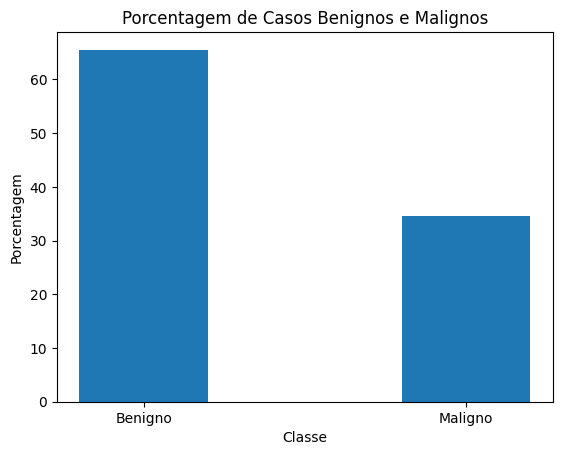

In [ ]:
# Contar a quantidade de casos benignos e malignos
counts = data['Class'].value_counts()

# Calcular as porcentagens
percentages = counts / len(data) * 100

# Plotar o gráfico de barras com as porcentagens
plt.bar(percentages.index, percentages.values)
plt.xlabel('Classe')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de Casos Benignos e Malignos')
plt.xticks([2, 4], ['Benigno', 'Maligno'])
plt.show()


In [ ]:
# Filtrar casos benignos e malignos
df_benign = data[data['Class'] == 2].drop('Class', axis=1)
df_malignant = data[data['Class'] == 4].drop('Class', axis=1)

# Calcular matriz de correlação para casos benignos
corr_benign = df_benign.corr()

# Calcular matriz de correlação para casos malignos
corr_malignant = df_malignant.corr()

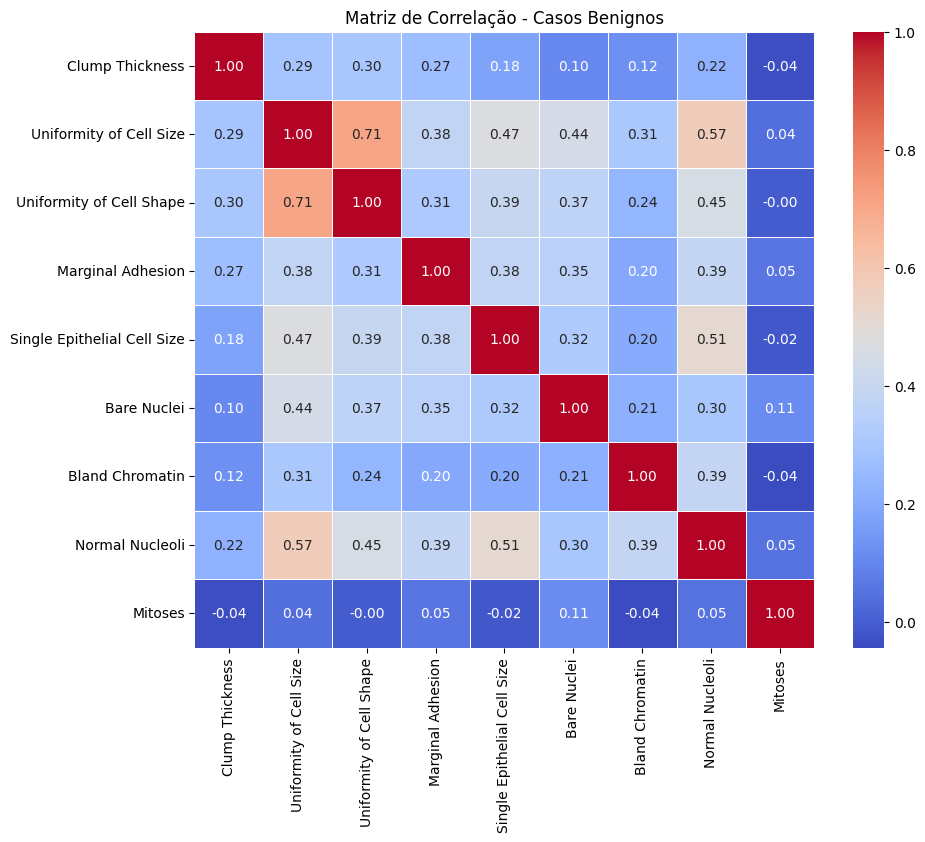

In [ ]:

# Plotar matriz de correlação para casos benignos
plt.figure(figsize=(10, 8))
sns.heatmap(corr_benign, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação - Casos Benignos')
plt.show()


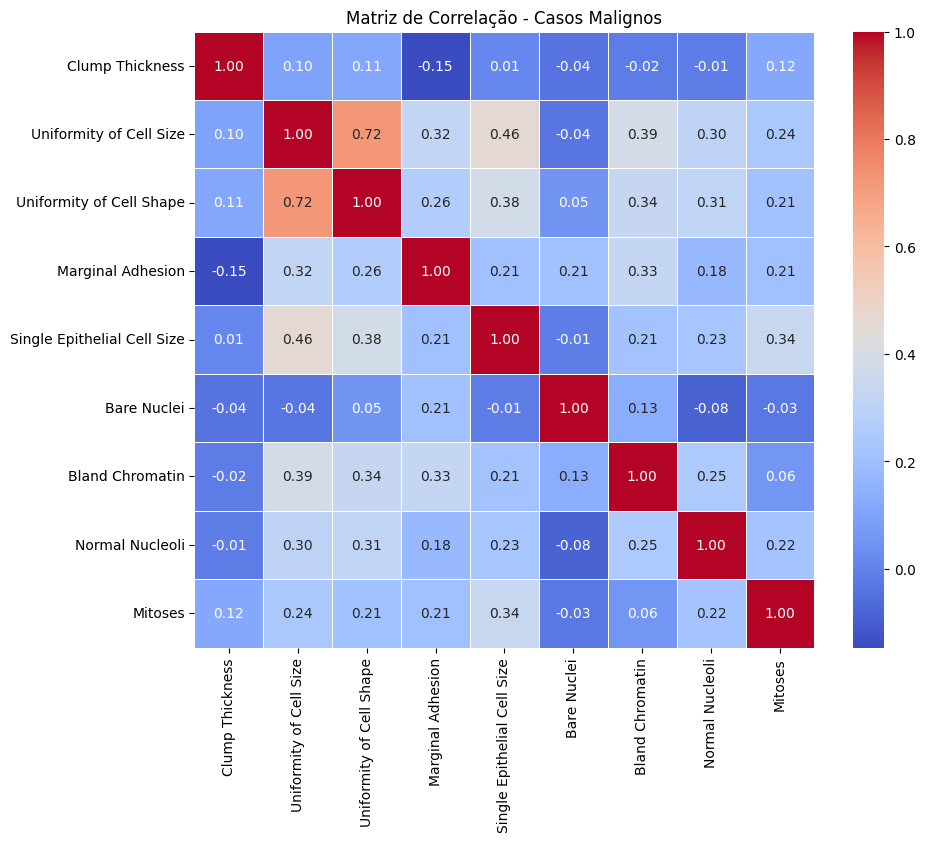

In [ ]:
# Plotar matriz de correlação para casos malignos
plt.figure(figsize=(10, 8))
sns.heatmap(corr_malignant, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação - Casos Malignos')
plt.show()

In [ ]:
# Criar o classificador da árvore de decisão
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# salvar o modelo treinado num arquivo .h5
filename = 'breast_cancer_model.h5'
joblib.dump(classifier, filename)

['breast_cancer_model.h5']

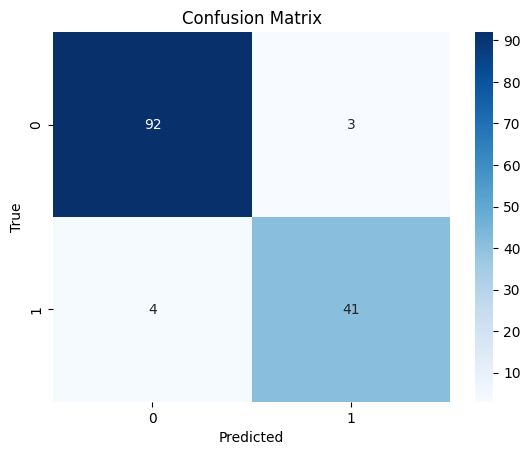

In [ ]:
# Fazer a previsão no conjunto de teste
y_pred = classifier.predict(X_test)

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão usando Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Calcular a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 95.00%


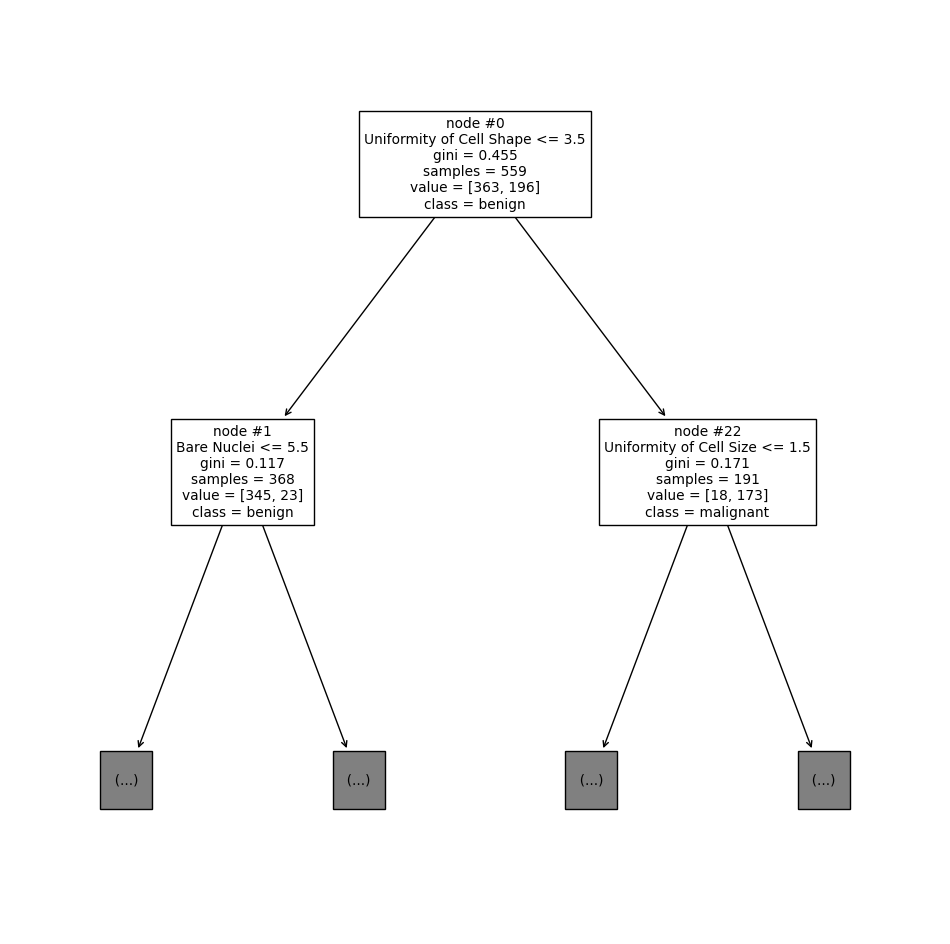

In [ ]:
# Selecionar o ramo que deseja plotar
sub_tree = classifier.tree_.children_left[0], classifier.tree_.children_right[0]

# Plotar a árvore de decisão com o ramo selecionado
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(classifier, ax=ax, max_depth=1, feature_names=X.columns, class_names=['benign', 'malignant'],
               node_ids=[0, sub_tree[0], sub_tree[1]])
plt.show()

In [ ]:
# Escrever os scores da árvore de decisão
print('Scores da árvore de decisão:')
for feature, score in zip(X.columns, classifier.feature_importances_):
    print(f'{feature}: {score * 100 :.2f}%')

Scores da árvore de decisão:
Clump Thickness: 3.99%
Uniformity of Cell Size: 3.77%
Uniformity of Cell Shape: 70.82%
Marginal Adhesion: 0.00%
Single Epithelial Cell Size: 2.56%
Bare Nuclei: 13.53%
Bland Chromatin: 1.48%
Normal Nucleoli: 3.25%
Mitoses: 0.59%


In [ ]:
# Remover colunas irrelevantes
new_df = df.drop(['Sample code number', 'Marginal Adhesion', 'Bland Chromatin', 'Mitoses'], axis=1)

# Exibir DataFrame atualizado
print(new_df.head())

# Separar os dados em atributos e rótulos
Xx = new_df.drop('Class', axis=1)
yy = new_df['Class']

# Dividir os dados em conjuntos de treinamento e teste
Xx_train, Xx_test, yy_train, yy_test = train_test_split(Xx, yy, test_size=0.2, random_state=42)

# Criar o classificador da árvore de decisão
new_classifier = DecisionTreeClassifier(random_state=42)
new_classifier.fit(Xx_train, yy_train)

# Fazer a previsão no conjunto de teste
yy_pred = new_classifier.predict(Xx_test)

# Calcular a acurácia das previsões
accuracyy = accuracy_score(yy_test, yy_pred) * 100
print(f'Accuracy: {accuracyy:.2f}%')

   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  Class  
0                            2            1                1      2  
1                            7           10                2      2  
2                            2            2                1      2  
3                            3            4                7      2  
4                            2            1                1      2  
Accuracy: 94.29%


In [ ]:
# Função para realizar a previsão e calcular a precisão
def predict_sample( thickness, size_uniformity, shape_uniformity, adhesion, epithelial_size,
                   bare_nuclei, chromatin, nucleoli, mitoses):
    sample = [thickness, size_uniformity, shape_uniformity, adhesion, epithelial_size,
              bare_nuclei, chromatin, nucleoli, mitoses]
    predicted_class = classifier.predict([sample])[0]
    prediction_prob = classifier.predict_proba([sample])[0]
    prediction_prob_percent = max(prediction_prob) * 100

    if predicted_class == 2:
        result = 'benign'
    else:
        result = 'malignant'

    return result, prediction_prob_percent

In [ ]:
# Exemplo de uso
thickness = 1
size_uniformity = 1
shape_uniformity = 1
adhesion = 1
epithelial_size = 1
bare_nuclei = 1
chromatin = 1
nucleoli = 1
mitoses = 1

result, accuracy = predict_sample(thickness, size_uniformity, shape_uniformity, adhesion,
                                 epithelial_size, bare_nuclei, chromatin, nucleoli, mitoses)

print(f'Result: {result}')
print(f'Accuracy: {accuracy:.2f}%')

Result: benign
Accuracy: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import joblib

# Carregar o modelo
model = joblib.load('breast_cancer_model.h5')

def predict_sample(thickness, size_uniformity, shape_uniformity, adhesion, epithelial_size,
                   bare_nuclei, chromatin, nucleoli, mitoses):
    sample = np.array([[thickness, size_uniformity, shape_uniformity, adhesion, epithelial_size,
                        bare_nuclei, chromatin, nucleoli, mitoses]])
    predicted_class = model.predict(sample)[0]

    if predicted_class == 2:
        result = 'benign'
    else:
        result = 'malignant'

    return result

thickness = 8
size_uniformity = 6
shape_uniformity = 8
adhesion = 9
epithelial_size = 9
bare_nuclei = 5
chromatin = 1
nucleoli = 5
mitoses = 3

result = predict_sample(thickness, size_uniformity, shape_uniformity, adhesion,
                        epithelial_size, bare_nuclei, chromatin, nucleoli, mitoses)

print(f'Result: {result}')


Result: malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
